# Découverte des données

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
d=pd.read_csv("./crets_2023.csv", sep=";")
d

C:\Users\FRANCHOMME LAETITIA\AppData\Local\Temp\ipykernel_9176\1964142650.py:1: DtypeWarning: Columns (1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  d=pd.read_csv("./crets_2023.csv", sep=";")


,REG,DEP,ZE,AAV,UU,COM,APE,A64,A38,A21,A10,TAILLE,CJ1,CJ2,FREQ
0,1,971,101,9A1,9A000,97111,1089Z,CA0,CA,C,BE,0,P,10,1
1,1,971,101,9A1,9A000,97111,1629Z,CC1,CC,C,BE,0,P,10,1
2,1,971,101,9A1,9A000,97111,4120A,FZ0,FZ,F,FZ,0,M,57,1
3,1,971,101,9A1,9A000,97111,4312A,FZ0,FZ,F,FZ,0,P,10,1
4,1,971,101,9A1,9A000,97111,4322B,FZ0,FZ,F,FZ,0,P,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542116,94,2B,9405,0,2B102,2B123,9329Z,RZ2,RZ,R,RU,0,M,57,2
542117,94,2B,9405,0,2B102,2B123,9329Z,RZ2,RZ,R,RU,0,P,10,1
542118,94,2B,9405,0,2B102,2B123,9529Z,SZ2,SZ,S,RU,0,P,10,1
542119,94,2B,9405,0,2B102,2B123,9602B,SZ3,SZ,S,RU,0,P,10,1


# Exploitation des données

In [27]:
d.isnull().sum()

REG       0
DEP       0
ZE        0
AAV       0
UU        0
COM       0
APE       0
A64       0
A38       0
A21       0
A10       0
TAILLE    0
CJ1       0
CJ2       0
FREQ      0
dtype: int64

In [28]:
d.dtypes

REG        int64
DEP       object
ZE         int64
AAV       object
UU        object
COM       object
APE       object
A64       object
A38       object
A21       object
A10       object
TAILLE     int64
CJ1       object
CJ2        int64
FREQ       int64
dtype: object

# Analyse des données

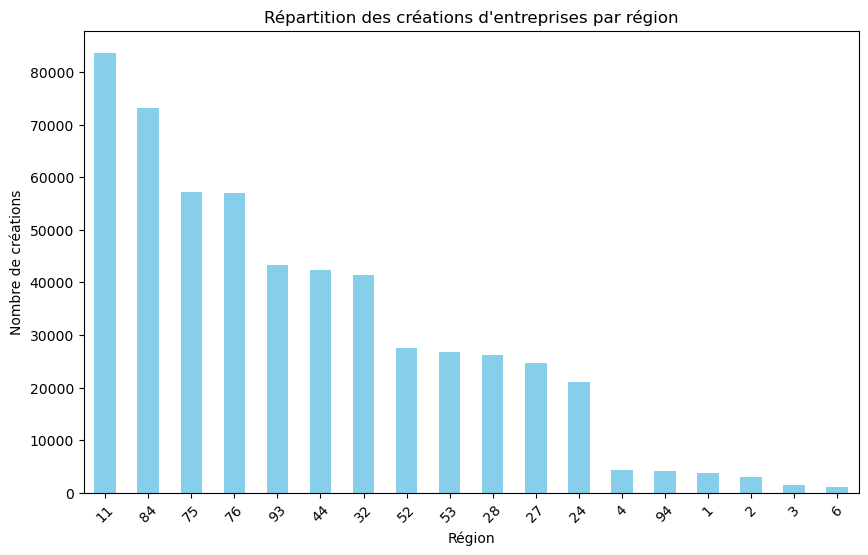

In [29]:
# Répartition des entreprises par région
region_count = d['REG'].value_counts()

# Création du graphique
plt.figure(figsize=(10, 6))
region_count.plot(kind='bar', color='skyblue')
plt.title('Répartition des créations d\'entreprises par région')
plt.xlabel('Région')
plt.ylabel('Nombre de créations')
plt.xticks(rotation=45)

# Enregistrer le graphique au format PNG
plt.savefig('graphique_region.png', format='png', dpi=300)  # 300 dpi pour une haute résolution

# Afficher le graphique
plt.show()


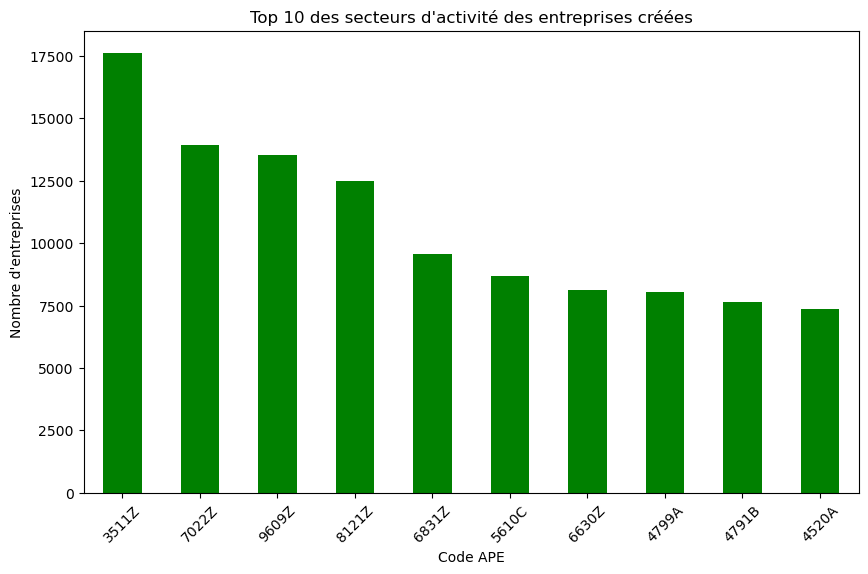

In [30]:
# Répartition des entreprises par secteur d'activité (APE)
ape_count = d['APE'].value_counts().head(10)  # Top 10 des secteurs

# Création du graphique
plt.figure(figsize=(10, 6))
ape_count.plot(kind='bar', color='green')
plt.title('Top 10 des secteurs d\'activité des entreprises créées')
plt.xlabel('Code APE')
plt.ylabel('Nombre d\'entreprises')
plt.xticks(rotation=45)

# Enregistrer le graphique au format PNG
plt.savefig('graphique_secactivité.png', format='png', dpi=300)  # 300 dpi pour une haute résolution

# Afficher le graphique
plt.show()


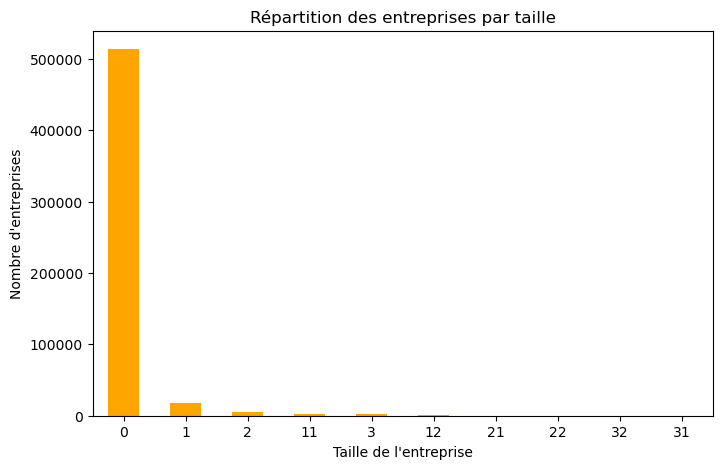

In [31]:
# Répartition des entreprises par taille
taille_count = d['TAILLE'].value_counts()

# Création du graphique
plt.figure(figsize=(8, 5))
taille_count.plot(kind='bar', color='orange')
plt.xticks(rotation="horizontal")
plt.title('Répartition des entreprises par taille')
plt.xlabel('Taille de l\'entreprise')
plt.ylabel('Nombre d\'entreprises')

# Enregistrer le graphique au format PNG
plt.savefig('graphique_taille.png', format='png', dpi=300)  # 300 dpi pour une haute résolution

# Afficher le graphique
plt.show()

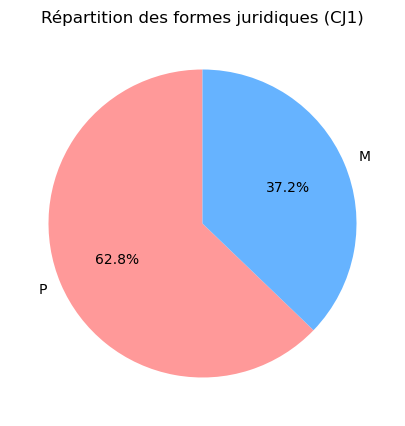

In [32]:
# Répartition des entreprises par forme juridique (CJ1)
cj1_count = d['CJ1'].value_counts()

# Création du graphique
plt.figure(figsize=(8, 5))
cj1_count.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Répartition des formes juridiques (CJ1)')
plt.ylabel('')

# Enregistrer le graphique au format PNG
plt.savefig('graphique_juri.png', format='png', dpi=300)  # 300 dpi pour une haute résolution

# Afficher le graphique
plt.show()

In [33]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542121 entries, 0 to 542120
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   REG     542121 non-null  int64 
 1   DEP     542121 non-null  object
 2   ZE      542121 non-null  int64 
 3   AAV     542121 non-null  object
 4   UU      542121 non-null  object
 5   COM     542121 non-null  object
 6   APE     542121 non-null  object
 7   A64     542121 non-null  object
 8   A38     542121 non-null  object
 9   A21     542121 non-null  object
 10  A10     542121 non-null  object
 11  TAILLE  542121 non-null  int64 
 12  CJ1     542121 non-null  object
 13  CJ2     542121 non-null  int64 
 14  FREQ    542121 non-null  int64 
dtypes: int64(5), object(10)
memory usage: 62.0+ MB


In [34]:
# Séparation de notre Data en deux (catégorie et numérique)
cat_d=[]
num_d=[]
for i,j in enumerate(d.dtypes):
    if j==object:
        cat_d.append(d.iloc[:,i])
    else:
        num_d.append(d.iloc[:,i])
cat_d=pd.DataFrame(cat_d).transpose()
num_d=pd.DataFrame(num_d).transpose()

In [35]:
num_d.head()

,REG,ZE,TAILLE,CJ2,FREQ
0,1,101,0,10,1
1,1,101,0,10,1
2,1,101,0,57,1
3,1,101,0,10,1
4,1,101,0,10,1


In [40]:
# Matrice de corrélation
num_d.corr()

,REG,ZE,TAILLE,CJ2,FREQ
REG,1.000000,0.938169,-0.038045,-0.036467,-0.034226
ZE,0.938169,1.000000,-0.034738,-0.032161,-0.030462
TAILLE,-0.038045,-0.034738,1.000000,0.167331,-0.014789
CJ2,-0.036467,-0.032161,0.167331,1.000000,-0.036687
FREQ,-0.034226,-0.030462,-0.014789,-0.036687,1.000000


# REGRESSION LINEAIRE

In [37]:
# Définir les variables indépendantes (X) et dépendante (Y)
X = d['REG']  # Variables explicatives
Y = d['ZE']  # Variable cible

                            OLS Regression Results                            
Dep. Variable:                     ZE   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                 3.195e+06
Date:                Wed, 19 Mar 2025   Prob (F-statistic):               0.00
Time:                        18:14:32   Log-Likelihood:            -3.6271e+06
No. Observations:              433696   AIC:                         7.254e+06
Df Residuals:                  433694   BIC:                         7.254e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.4553      3.218      4.181      0.0

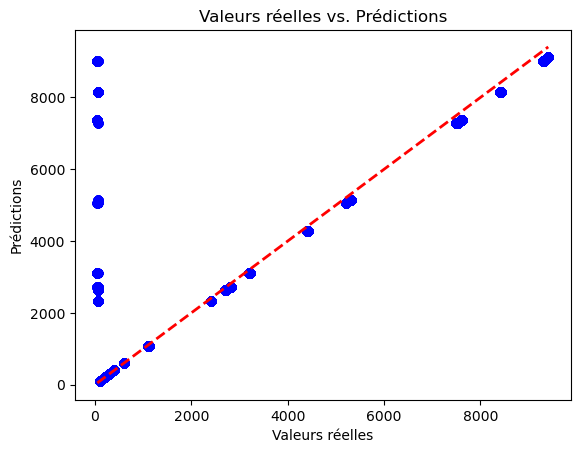

In [38]:
# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Ajouter une constante pour le modèle de régression
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Appliquer le modèle de régression linéaire
model = sm.OLS(Y_train, X_train_const)
results = model.fit()

# Résumé des résultats
result_summary= results.summary()
print(result_summary)

# Sauvegarder le résumé dans un fichier texte
with open("regression_results.txt", "w") as file:
    file.write(result_summary.as_text())

# Prédictions
Y_pred = results.predict(X_test_const)

# Évaluer le modèle
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

plt.scatter(Y_test, Y_pred, alpha=0.7, color="blue")
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], '--r', linewidth=2)
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Valeurs réelles vs. Prédictions")
plt.savefig("regression_plot.png", dpi=300)  # Enregistrer le graphique en PNG
plt.show()
